In [1]:
import keras
from keras import layers
from keras import backend as K
from keras import optimizers
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2

/home/julio/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
#signals used to train and test the model 
name = "piminus_Pion-Eta0-PhiPiOver2-Energy50.npy"
data = np.load(name)
print(data.shape)

(20549, 28, 28)


In [3]:
limit = 20549
signal = np.zeros(limit)
for i in range(limit):
    signal[i] = np.sum(data[i].flatten())

In [4]:
temp = 0
for i in range(limit):
    print("Enegy of signal " + str(i) + ": " + str(signal[i]))
    temp  = temp + signal[i]
print("Energia do Sinal Médio >>>>>>>>>>>>> " + str(temp/20549))

Enegy of signal 0: 0.2903674840927124
Enegy of signal 1: 41.57664108276367
Enegy of signal 2: 0.013206344097852707
Enegy of signal 3: 0.6326302886009216
Enegy of signal 4: 20.49186897277832
Enegy of signal 5: 15.251699447631836
Enegy of signal 6: 0.26960715651512146
Enegy of signal 7: 0.28193148970603943
Enegy of signal 8: 24.208019256591797
Enegy of signal 9: 3.4114229679107666
Enegy of signal 10: 21.176002502441406
Enegy of signal 11: 0.725356936454773
Enegy of signal 12: 0.370684415102005
Enegy of signal 13: 26.876821517944336
Enegy of signal 14: 0.3748722970485687
Enegy of signal 15: 0.2592140734195709
Enegy of signal 16: 18.806360244750977
Enegy of signal 17: 11.39218521118164
Enegy of signal 18: 0.291858434677124
Enegy of signal 19: 15.809152603149414
Enegy of signal 20: 0.5236045718193054
Enegy of signal 21: 23.778791427612305
Enegy of signal 22: 5.611175060272217
Enegy of signal 23: 27.989086151123047
Enegy of signal 24: 7.734916687011719
Enegy of signal 25: 6.966787815093994
E

Enegy of signal 3966: 0.3502027988433838
Enegy of signal 3967: 0.3457718789577484
Enegy of signal 3968: 0.3026915490627289
Enegy of signal 3969: 27.32343864440918
Enegy of signal 3970: 40.231788635253906
Enegy of signal 3971: 22.768016815185547
Enegy of signal 3972: 0.3003466725349426
Enegy of signal 3973: 10.353926658630371
Enegy of signal 3974: 17.646982192993164
Enegy of signal 3975: 6.427000999450684
Enegy of signal 3976: 0.25524988770484924
Enegy of signal 3977: 0.3808572292327881
Enegy of signal 3978: 17.322818756103516
Enegy of signal 3979: 21.14288330078125
Enegy of signal 3980: 0.9574302434921265
Enegy of signal 3981: 27.16812515258789
Enegy of signal 3982: 0.282770037651062
Enegy of signal 3983: 0.34440135955810547
Enegy of signal 3984: 0.27632683515548706
Enegy of signal 3985: 0.26721546053886414
Enegy of signal 3986: 12.070563316345215
Enegy of signal 3987: 29.13462257385254
Enegy of signal 3988: 19.405271530151367
Enegy of signal 3989: 0.47061797976493835
Enegy of signal 3

Enegy of signal 7965: 35.60944366455078
Enegy of signal 7966: 9.585792541503906
Enegy of signal 7967: 40.44952392578125
Enegy of signal 7968: 0.2828298807144165
Enegy of signal 7969: 37.877742767333984
Enegy of signal 7970: 0.2649820148944855
Enegy of signal 7971: 9.02881908416748
Enegy of signal 7972: 20.770761489868164
Enegy of signal 7973: 0.38241392374038696
Enegy of signal 7974: 1.2106411457061768
Enegy of signal 7975: 4.982786178588867
Enegy of signal 7976: 13.506816864013672
Enegy of signal 7977: 25.767230987548828
Enegy of signal 7978: 20.54339599609375
Enegy of signal 7979: 0.20323136448860168
Enegy of signal 7980: 36.9924201965332
Enegy of signal 7981: 0.31597182154655457
Enegy of signal 7982: 16.211383819580078
Enegy of signal 7983: 31.755416870117188
Enegy of signal 7984: 0.3000043034553528
Enegy of signal 7985: 25.183658599853516
Enegy of signal 7986: 22.238794326782227
Enegy of signal 7987: 15.36697006225586
Enegy of signal 7988: 40.31743240356445
Enegy of signal 7989: 20

Enegy of signal 12465: 6.915600776672363
Enegy of signal 12466: 0.12086688727140427
Enegy of signal 12467: 0.2982126474380493
Enegy of signal 12468: 0.3482149541378021
Enegy of signal 12469: 28.39086151123047
Enegy of signal 12470: 15.872523307800293
Enegy of signal 12471: 0.4775782823562622
Enegy of signal 12472: 0.6107131242752075
Enegy of signal 12473: 25.364803314208984
Enegy of signal 12474: 10.865859985351562
Enegy of signal 12475: 10.845349311828613
Enegy of signal 12476: 0.44201672077178955
Enegy of signal 12477: 0.13159538805484772
Enegy of signal 12478: 21.92894744873047
Enegy of signal 12479: 0.41269758343696594
Enegy of signal 12480: 14.852484703063965
Enegy of signal 12481: 2.3278632164001465
Enegy of signal 12482: 39.970298767089844
Enegy of signal 12483: 26.645362854003906
Enegy of signal 12484: 5.12100887298584
Enegy of signal 12485: 0.29558688402175903
Enegy of signal 12486: 2.6687891483306885
Enegy of signal 12487: 0.2629234194755554
Enegy of signal 12488: 16.79325103

Enegy of signal 16964: 15.785682678222656
Enegy of signal 16965: 43.754966735839844
Enegy of signal 16966: 20.34558868408203
Enegy of signal 16967: 14.248819351196289
Enegy of signal 16968: 0.2894402742385864
Enegy of signal 16969: 28.445066452026367
Enegy of signal 16970: 4.0521769523620605
Enegy of signal 16971: 15.797191619873047
Enegy of signal 16972: 0.42638424038887024
Enegy of signal 16973: 42.21780014038086
Enegy of signal 16974: 0.40002045035362244
Enegy of signal 16975: 0.27017951011657715
Enegy of signal 16976: 1.0275145769119263
Enegy of signal 16977: 12.76004409790039
Enegy of signal 16978: 0.3609554171562195
Enegy of signal 16979: 22.685916900634766
Enegy of signal 16980: 1.3247723579406738
Enegy of signal 16981: 15.726438522338867
Enegy of signal 16982: 11.675371170043945
Enegy of signal 16983: 18.395282745361328
Enegy of signal 16984: 0.32635724544525146
Enegy of signal 16985: 0.29779019951820374
Enegy of signal 16986: 0.29077523946762085
Enegy of signal 16987: 19.43669

In [5]:
print("Sinal usado neste ensaio : " + name)

Sinal usado neste ensaio : piminus_Pion-Eta0-PhiPiOver2-Energy50.npy


In [6]:
print("Maxima Energia: "+str(np.max(signal)))

Maxima Energia: 49.12188720703125


In [7]:
print("Mínima Energia: "+str(np.min(signal)))

Mínima Energia: 0.010009774006903172


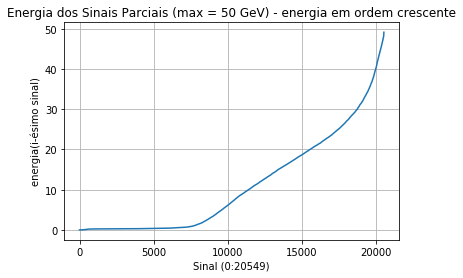

In [8]:
plt.title("Energia dos Sinais Parciais (max = 50 GeV) - energia em ordem crescente")
plt.xlabel("Sinal (0:20549)")
plt.ylabel("energia(i-ésimo sinal)")
plt.grid()
plt.plot((np.sort(signal)))
plt.show()

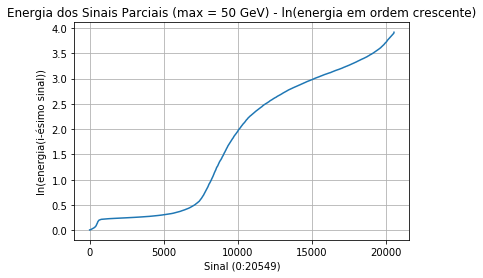

In [9]:
plt.title("Energia dos Sinais Parciais (max = 50 GeV) - ln(energia em ordem crescente)")
plt.xlabel("Sinal (0:20549)")
plt.ylabel("ln(energia(i-ésimo sinal))")
plt.grid()
plt.plot(np.log1p(np.sort(signal)))
plt.show()


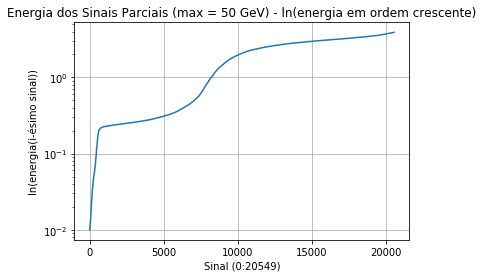

In [10]:
plt.title("Energia dos Sinais Parciais (max = 50 GeV) - ln(energia em ordem crescente)")
plt.xlabel("Sinal (0:20549)")
plt.ylabel("ln(energia(i-ésimo sinal))")
plt.grid()
plt.semilogy()
plt.plot(np.log1p(np.sort(signal)))
plt.show()

In [ ]:
#Redução do Conjunto de Dados (Apenas os sinais com Enegia <= 0.5 Gev)

In [13]:
data_t = data[signal < 0.5]

In [14]:
data_t.shape #6399/20549  Sinais parciais que serão usados na simulacao

(6399, 28, 28)

In [16]:
limit = data_t.shape[0]
print(limit)
signal_t = np.zeros(limit) #6399 componentes 
for i in range(limit): #0 a 6398 
    signal_t[i] = np.sum(data_t[i].flatten()) #cada componente do sinal (i) acumula a energia em data_t[i] apenas sinais com menos de 0.5GeV

6399


In [17]:
print("Maxima Energia: "+str(np.max(signal_t))) #confirma que estamos trabalhando na faixa Gev < 0.5 

Maxima Energia: 0.499929815530777


In [18]:
print("Mínima Energia: "+str(np.min(signal_t))) # Gev < 0.5 (descartamos todos os demais gerais de nossa massa de testes)

Mínima Energia: 0.010009774006903172


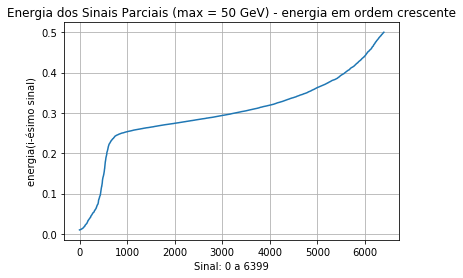

In [19]:
plt.title("Energia dos Sinais Parciais (max = 50 GeV) - energia em ordem crescente")
plt.xlabel("Sinal: 0 a 6399")
plt.ylabel("energia(i-ésimo sinal)")
plt.grid()
plt.plot((np.sort(signal_t)))
plt.show()

In [20]:
#Simulação com o sub_conjunto de dados

In [21]:
input_img = keras.Input(shape=img_shape)
x = layers.Conv2D(32, 3,padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3,padding='same', activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(64, 3,padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3,padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [22]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon
z = layers.Lambda(sampling)([z_mean, z_log_var])

/home/julio/anaconda3/lib/python3.6/site-packages/keras/layers/core.py:661: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `[(None, 2), (None, 2)]` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [23]:
decoder_input = layers.Input(K.int_shape(z)[1:])
x = layers.Dense(np.prod(shape_before_flattening[1:]),activation='relu')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, 3,padding='same',activation='relu',strides=(2, 2))(x)
x = layers.Conv2D(1, 3,padding='same',activation='sigmoid')(x)
decoder = Model(decoder_input, x)
z_decoded = decoder(z)

In [24]:
class CustomVariationalLayer(keras.layers.Layer):
   
    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)
    
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
y = CustomVariationalLayer()([input_img, z_decoded])
    

In [25]:
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)

In [26]:
#Massa de Dados para Simulação: data_t, ou seja sinais com Energia <= 0.5 Gev
data_t.shape
print("20% de validacao")
data_t_train = data_t[:5119,:,:]
data_t_test = data_t[5119:,:,:]

20% de validacao


In [27]:
data_t.shape

(6399, 28, 28)

In [28]:
data_t_train.shape

(5119, 28, 28)

In [29]:
data_t_test.shape

(1280, 28, 28)

In [30]:
data_t_train = data_t_train.reshape(data_t_train.shape + (1,))
print(data_t_train.shape)
data_t_test = data_t_test.reshape(data_t_test.shape + (1,))
print(data_t_test.shape)
vae.fit(x=data_t_train, y=None,shuffle=True,epochs=3,batch_size=100,validation_data=(data_t_test, None))

(5119, 28, 28, 1)
(1280, 28, 28, 1)
Train on 5119 samples, validate on 1280 samples
Epoch 1/3
5119/5119 [==============================] - 14s 3ms/step - loss: 48.7785 - val_loss: 0.0121
Epoch 2/3
5119/5119 [==============================] - 14s 3ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 3/3
5119/5119 [==============================] - 13s 3ms/step - loss: 0.0016 - val_loss: 0.0014


In [32]:
np.sort(signal_t).shape #Sinais Originais com Energia < 0.5 

(6399,)

In [36]:
sreal_t = np.zeros(784) #Sinal real gerado por todos os sinais com energia < 0.5 Gev
limit = data_t.shape[0]
print(limit) #limit = 6399
for i in range(limit):
    sreal_t = sreal_t + data_t[i].flatten() #integração dos sinais parciais 0 a 6398, Energia < 0.5 GeV


6399


In [43]:
#Sinal Real com Energia Inferior a 0.5 Gev 
print("Energia do Sinal Real Gerado pela Integração de 6399 sinais < 0.5 GeV : "+str(np.sum(sreal_t)/6399))

Energia do Sinal Real Gerado pela Integração de 6399 sinais < 0.5 GeV : 0.2997009527403352


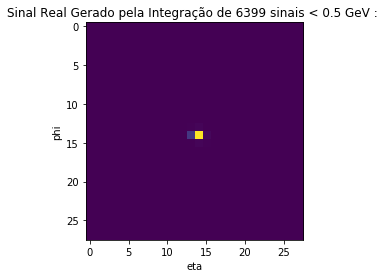

In [50]:
plt.title("Sinal Real Gerado pela Integração de 6399 sinais < 0.5 GeV : ")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(sreal_t.reshape(28,28))
plt.show()


In [51]:
#Contrução de um Sinal Sintético usando os sinais gerado a partir do espaço latente do autoenconder. 
limit_i = 80
limit_j = 80
signal_counter = 0 

synthetic_signal = np.zeros((1,28,28))
partial_signals = np.zeros((limit_i*limit_j,28,28))
print(synthetic_signal.shape)
print(partial_signals.shape)
for i in range(limit_i):
    for j in range(limit_j):
        z_sample = np.array([[i, j]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        partial_signals[signal_counter,:,:] = x_decoded[0].reshape(28,28)
        signal_counter = signal_counter + 1 
        synthetic_signal = synthetic_signal + x_decoded[0].reshape(28,28) 


(1, 28, 28)
(6400, 28, 28)


In [55]:
print("Numero de Sinais Sintéticos Parciais Gerados a partir do Espaço Latente : "+str(partial_signals.shape))


Numero de Sinais Sintéticos Parciais Gerados a partir do Espaço Latente : (6400, 28, 28)


In [58]:
print("Sinal Sintetico Contruido pela Integração dos 6400 Sinais Sintéticos Parciais: "+(str(synthetic_signal.shape)))


Sinal Sintetico Contruido pela Integração dos 6400 Sinais Sintéticos Parciais: (1, 28, 28)


Sinal Sintético (ln)formado por:6400 amostras


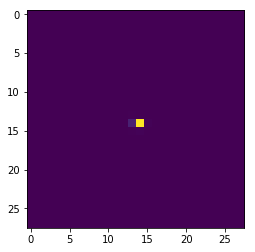

In [60]:
print("Sinal Sintético (ln)formado por:"+str(limit_i*limit_j)+" amostras")
plt.imshow(np.log1p(synthetic_signal[0,:,:]))
plt.show()

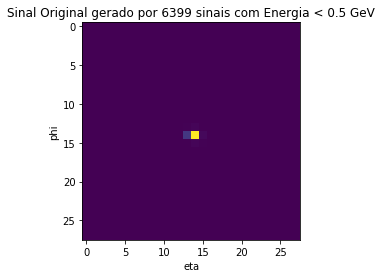

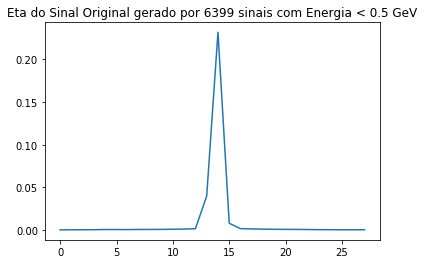

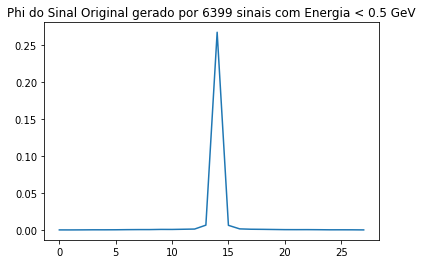

In [89]:
#Eta e Phi do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV
real = sreal_t.reshape(28,28) 
plt.title("Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(real)
plt.show()

plt.title("Eta do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
eta = np.sum(real/6400,axis=0)
plt.plot(eta)
plt.show()

plt.title("Phi do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
phi = np.sum(real/6400,axis=1)
plt.plot(phi)
plt.show()


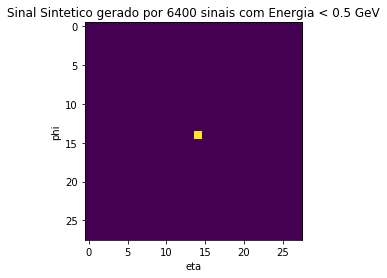

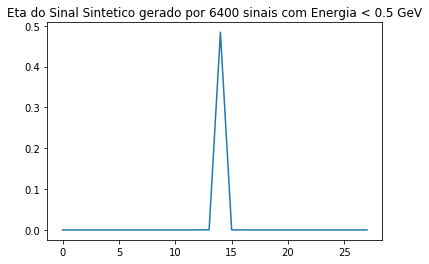

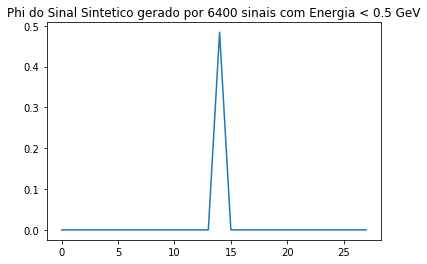

In [91]:
syn = synthetic_signal.reshape(28,28) 
plt.title("Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(syn)
plt.show()

plt.title("Eta do Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
eta = np.sum(syn/6400,axis=0)
plt.plot(eta)
plt.show()

plt.title("Phi do Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
phi = np.sum(syn/6400,axis=1)
plt.plot(phi)
plt.show()

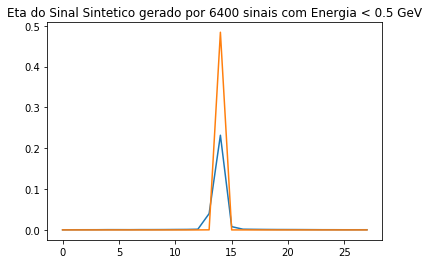

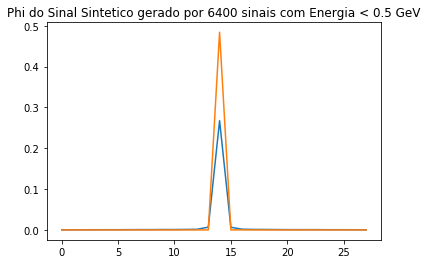

In [92]:
#Sobreposicao 
plt.title("Eta do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
eta = np.sum(real/6400,axis=0)
plt.plot(eta)

plt.title("Eta do Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
eta = np.sum(syn/6400,axis=0)
plt.plot(eta)

plt.show()


plt.title("Phi do Sinal Original gerado por 6399 sinais com Energia < 0.5 GeV")
phi = np.sum(real/6400,axis=1)
plt.plot(phi)

plt.title("Phi do Sinal Sintetico gerado por 6400 sinais com Energia < 0.5 GeV")
phi = np.sum(syn/6400,axis=1)
plt.plot(phi)

plt.show()